In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import

In [65]:
movies_df = pd.read_csv('../raw_data/IMDb movies.csv')
names = pd.read_csv('../raw_data/IMDb names.csv')
titles = pd.read_csv('../raw_data/IMDb title_principals.csv')

/home/pierre/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df = movies_df.loc[(movies_df['budget'].isna()==False) & (movies_df['worlwide_gross_income'].isna()==False)].copy()
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...","Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.1,55601,$ 18000,$ 8811,$ 8811,NaN,237.0,160.0
210,tt0011440,Markens grøde,Markens grøde,1921,1921-12-02,Drama,107,Norway,NaN,Gunnar Sommerfeldt,...,"Amund Rydland, Karen Poulsen, Ragna Wettergree...",After the Nobel prize winning Knut Hamsun-nove...,6.6,195,NOK 250000,NaN,$ 4272,NaN,3.0,3.0
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",An extended family split up in France and Germ...,7.2,3058,$ 800000,$ 9183673,$ 9183673,NaN,45.0,16.0
251,tt0012349,Il monello,The Kid,1921,1923-11-26,"Comedy, Drama, Family",68,USA,"English, None",Charles Chaplin,...,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...","The Tramp cares for an abandoned child, but ev...",8.3,109038,$ 250000,NaN,$ 26916,NaN,173.0,105.0
348,tt0014624,La donna di Parigi,A Woman of Paris: A Drama of Fate,1923,1927-06-06,"Drama, Romance",82,USA,"None, English",Charles Chaplin,...,"Edna Purviance, Clarence Geldart, Carl Miller,...",A kept woman runs into her former fiancé and f...,7.0,4735,$ 351000,NaN,$ 11233,NaN,37.0,24.0


In [6]:
df.reset_index(inplace=True)

In [7]:
# df.budget.replace(value='', regex="\$")

### Cleaning

#### Budget

In [8]:
df['budget'] = df['budget'].str.strip() # supprime les espaces à la fin et au début
df['budget'] = df['budget'].str.split() # split la string en mots

df['currency'] = df['budget'].apply(lambda x: x[0])
df['budget'] = df['budget'].apply(lambda x: x[1]).astype('int64')

In [9]:
df.currency.unique()

array(['$', 'NOK', 'GBP', 'DEM', 'FRF', 'SEK', 'ITL', 'JPY', 'RUR', 'AUD',
       'HKD', 'CAD', 'ESP', 'IEP', 'DKK', 'BEF', 'INR', 'EUR', 'ISK',
       'PHP', 'FIM', 'BRL', 'CZK', 'NLG', 'ATS', 'CNY', 'BND', 'HUF',
       'THB', 'ZAR', 'SGD', 'KRW', 'PLN', 'EGP', 'MXN', 'NZD', 'CHF',
       'SKK', 'BGL', 'EEK', 'TWD', 'LVL', 'TRL', 'YUM', 'ARS', 'MYR',
       'IDR', 'UAH', 'RON', 'VEB', 'LTL', 'CLP', 'PKR', 'NGN', 'COP',
       'HRK', 'IRR', 'DOP', 'ILS', 'AMD', 'BDT', 'AED'], dtype=object)

#### Income 

In [10]:
df['worlwide_gross_income'] = df['worlwide_gross_income'].str.strip() # supprime les espaces à la fin et au début
df['worlwide_gross_income'] = df['worlwide_gross_income'].str.split() # split la string en mots

df['worlwide_gross_income'] = df['worlwide_gross_income'].apply(lambda x: x[1]).astype('int64')
df['worlwide_gross_income']

0           8811
1           4272
2        9183673
3          26916
4          11233
          ...   
12757       9306
12758       2568
12759      83857
12760     524061
12761       4791
Name: worlwide_gross_income, Length: 12762, dtype: int64

#### Baseline

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [69]:
# Declaring X and y
reg_df = df[df.currency == '$'].copy()
X = reg_df[['budget', 'avg_vote', 'duration']]
y = reg_df['worlwide_gross_income']
# X.avg_vote.hist()
X.shape, y.shape

((9025, 3), (9025,))

In [71]:
# Scaling avg_vote
scaler = RobustScaler()
X['avg_vote'] = scaler.fit_transform(X[['avg_vote']])

/tmp/ipykernel_1112/3973795352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['avg_vote'] = scaler.fit_transform(X[['avg_vote']])


In [72]:
# Model
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [74]:
# Baseline score
results = cross_val_score(reg, X, y, cv=10, scoring='r2')
results.mean()

0.4893042518334457

#### Plots

(0.0, 1000000000.0)

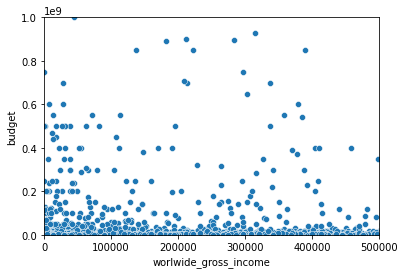

In [18]:
# Income vs Budget
sns.scatterplot(x=df.worlwide_gross_income, y=df.budget)
plt.xlim(left=0, right=500000)
plt.ylim(bottom=0, top=1000000000)

<AxesSubplot:xlabel='year', ylabel='worlwide_gross_income'>

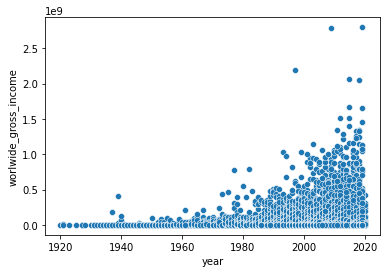

In [19]:
# Income vs year
sns.scatterplot(y=df.worlwide_gross_income, x=df.year)

In [20]:
df.year = df.year.astype('int64')

In [26]:
df.date_published = pd.to_datetime(df.date_published)

In [27]:
df[df.year==2020].shape

(70, 24)

<AxesSubplot:xlabel='date_published', ylabel='worlwide_gross_income'>

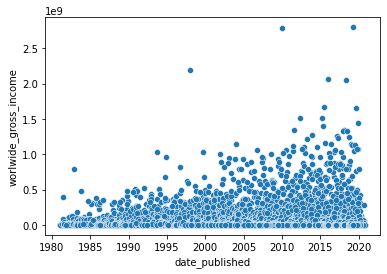

In [28]:
sns.scatterplot(y=df.worlwide_gross_income, x=df[df.year>1980].date_published)

In [29]:
df[df.worlwide_gross_income < 100].shape

(18, 24)